<a href="https://colab.research.google.com/github/martinthetechie/machine_learning/blob/dev/svms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


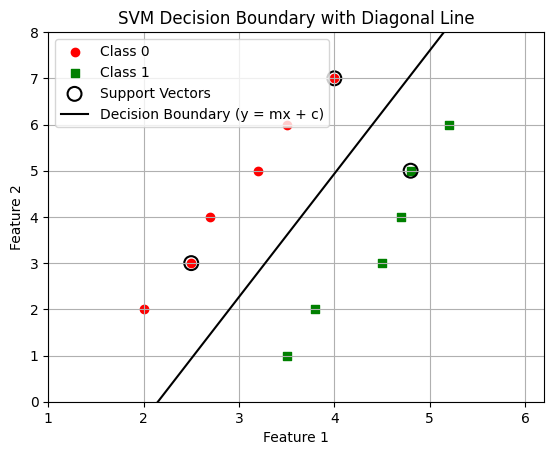

In [ ]:
# Define a small dataset of 12 points
X = np.array([
    [2, 2], [2.5, 3], [2.7, 4],
    [3.2, 5], [3.5, 6], [4, 7],
    [3.5, 1], [3.8, 2], [4.5, 3],
    [4.7, 4], [4.8, 5], [5.2, 6]
])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Plot the decision boundary
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]

# Calculate the slope (m) and intercept (c) of the decision boundary
m = -w[0] / w[1]
c = -b / w[1]

# Generate x values for plotting the decision boundary
x_plot = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
# Calculate the corresponding y values using y = mx + c
y_plot = m * x_plot + c

# Plot the data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', marker='s', label='Class 1')

# Plot the support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=100, linewidths=1.5, label='Support Vectors')

# Plot the decision boundary
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary (y = mx + c)')

plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Diagonal Line')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=1.0)

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

In [5]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 61   2]
 [  2 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



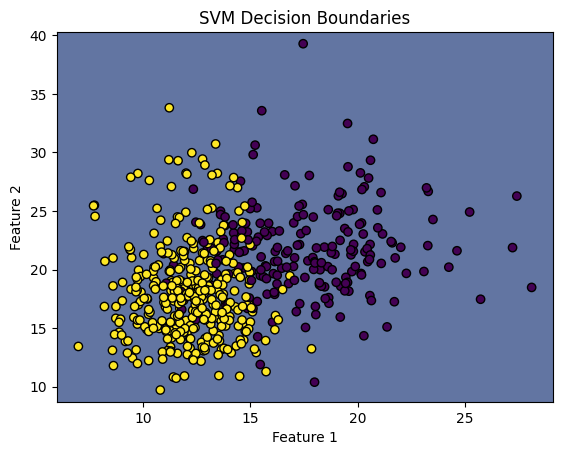

In [6]:
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundaries')
    plt.show()

# Note: The visualization works only with 2D features
# Using only the first two features for visualization
X_vis = X[:, :2]
X_train_vis = scaler.fit_transform(X_train[:, :2])
svm_vis = SVC(kernel='linear', C=1.0)
svm_vis.fit(X_train_vis, y_train)
plot_decision_boundaries(X_vis, y, svm_vis)

In [ ]:
# Implement for the kernel functions (Reusable Code)
# Define and train SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svms = {kernel: SVC(kernel=kernel, C=1.0) for kernel in kernels}

# Train and evaluate each SVM
for kernel, svm in svms.items():
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

In [ ]:
# Custom Kernel
#  Define a custom kernel function
def custom_kernel(X, Y):
    # Example: Quadratic kernel
    return np.dot(X, Y.T) ** 2

# Create an SVM classifier with the custom kernel
svm_custom = SVC(kernel=custom_kernel, C=1.0)

# Train the custom SVM classifier
svm_custom.fit(X_train, y_train)

# Make predictions
y_pred_custom = svm_custom.predict(X_test)